In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../Cleaning_Engineering/base_cleaned.csv")

In [30]:
data

,Unnamed: 0,distance,cab_type,source,destination,name,car_type,weekday,rush_hour,temp,clouds,pressure,rain,humidity,wind,is_raining,temp_groups,surge_multiplier,price,base_price
0,0,3.03,Lyft,Boston University,Theatre District,Lux Black XL,Luxury SUV,1,0,41.07,0.86,1014.39,NaN,0.92,1.36,0,40,1.0,34.0,27.0
1,545,2.94,Lyft,Boston University,Theatre District,Lux Black XL,Luxury SUV,1,0,40.61,0.92,1013.75,NaN,0.92,2.85,0,40,1.0,38.5,27.0
2,988,3.04,Lyft,Boston University,Theatre District,Lux Black XL,Luxury SUV,1,0,40.64,0.89,1013.82,NaN,0.92,1.74,0,40,1.0,32.5,27.0
3,1745,2.95,Lyft,Boston University,Theatre District,Lux Black XL,Luxury SUV,1,0,40.41,1.00,1014.17,NaN,0.91,1.20,0,40,1.0,34.0,27.0
4,1839,2.98,Uber,Boston University,Theatre District,Black SUV,Luxury SUV,1,0,40.41,1.00,1014.17,NaN,0.91,1.20,0,40,1.0,33.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,634709,3.04,Uber,Boston University,West End,WAV,Wheel Chair Accessible,1,1,30.09,0.15,1011.46,NaN,0.46,13.29,0,30,1.0,9.5,7.5
637972,635107,3.04,Uber,Boston University,West End,WAV,Wheel Chair Accessible,1,1,30.09,0.15,1011.46,NaN,0.46,13.29,0,30,1.0,9.0,7.5
637973,636053,3.04,Uber,Boston University,West End,WAV,Wheel Chair Accessible,1,0,30.09,0.15,1011.46,NaN,0.46,13.29,0,30,1.0,9.5,7.5
637974,637707,3.04,Uber,Boston University,West End,WAV,Wheel Chair Accessible,1,0,30.96,0.00,1012.35,NaN,0.45,12.93,0,30,1.0,8.0,7.5


In [4]:

# Calculate the base_price, quartiles, and means for each source-destination-cartye combination from the original data
base_price_series = data.groupby(['source', 'destination', 'car_type'])['price'].min()
first_quartile_series = data.groupby(['source', 'destination', 'car_type'])['price'].quantile(0.25)
mean_price_series = data.groupby(['source', 'destination', 'car_type'])['price'].mean()
third_quartile_series = data.groupby(['source', 'destination', 'car_type'])['price'].quantile(0.75)
max_price_series = data.groupby(['source', 'destination', 'car_type'])['price'].max()

# Merge the base prices back into the original DataFrame
data = data.merge(base_price_series.rename('base_price'), on=['source', 'destination', 'car_type'])
#data = data.merge(first_quartile_series.rename('first_quartile_price'), on=['source', 'destination', 'car_type'])
#data = data.merge(mean_price_series.rename('mean_price'), on=['source', 'destination', 'car_type'])
#data = data.merge(third_quartile_series.rename('third_quartile_price'), on=['source', 'destination', 'car_type'])
#data = data.merge(max_price_series.rename('max_price'), on=['source', 'destination', 'car_type'])



In [14]:
# Data breakdown for each combination min, quartiles and max
base_price_df = base_price_series.reset_index(name='base_price')
distribution_df = base_price_df.merge(first_quartile_series.rename("first_quartile"), on=['source', 'destination', 'car_type'])
distribution_df = distribution_df.merge(mean_price_series.rename("mean_price"), on=['source', 'destination', 'car_type'])
distribution_df = distribution_df.merge(third_quartile_series.rename("third_quartile"), on=['source', 'destination', 'car_type'])
distribution_df = distribution_df.merge(max_price_series.rename("max_price"), on=['source', 'destination', 'car_type'])

In [17]:
car_types = list(set(distribution_df.car_type))

Each visual shows how for each car type how the distributioin differs per location. For example base price from Fenway might be different than another location which creates the distribtuion. Chart to chart comparision you can see the difference bectween car type prices.

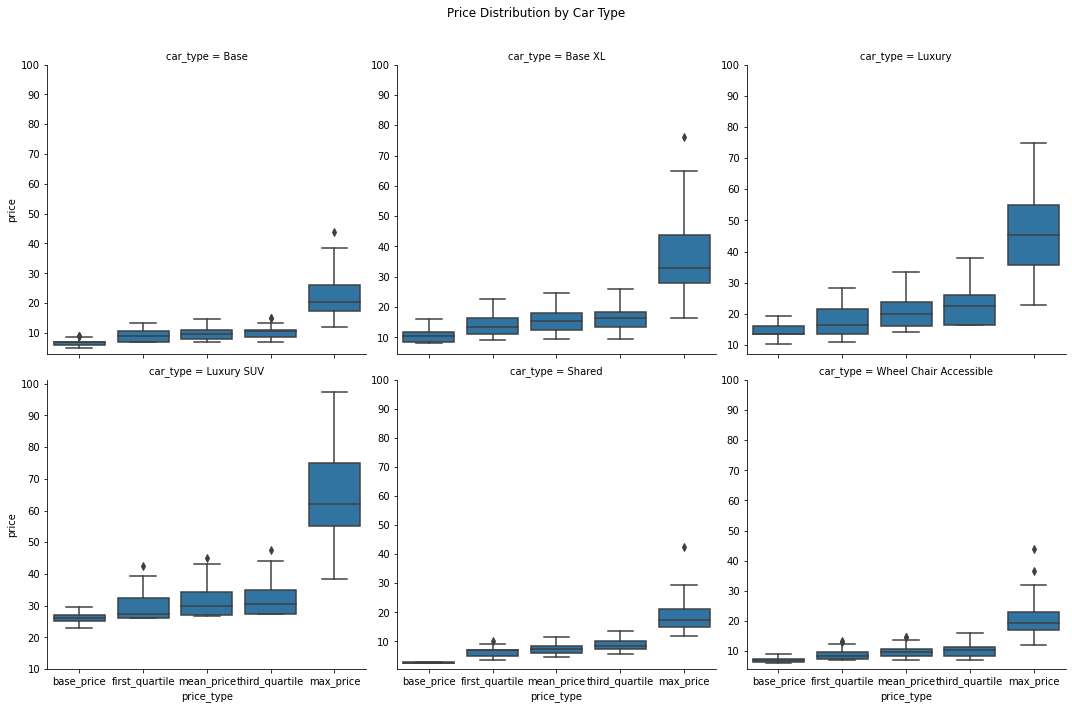

In [27]:
# You want to plot 'base_price', 'first_quartile', 'mean_price', 'third_quartile', 'max_price'.

# You may need to reformat your data to have 'price_type' and 'price' columns.
df_melted = distribution_df.melt(id_vars=['source', 'destination', 'car_type'],
                                 value_vars=['base_price', 'first_quartile', 'mean_price', 'third_quartile', 'max_price'],
                                 var_name='price_type', value_name='price')
# Set the order of the categories
price_type_order = ['base_price', 'first_quartile', 'mean_price', 'third_quartile', 'max_price']

# Create a FacetGrid object with a boxplot for each 'car_type'
g = sns.FacetGrid(df_melted, col='car_type', col_wrap=3, sharex=True, sharey=False, height=5)

# Map the boxplot with the order of price types
g.map(sns.boxplot, 'price_type', 'price', order=price_type_order)


# Define the x-axis limits and ticks
y_ticks = list(range(10, 101, 10))
g.set(yticks=y_ticks)  # Set the same x-ticks for all the axes

# Adding some additional customizations
g.fig.subplots_adjust(top=0.9)  # Adjust the Figure in 'g'
g.fig.suptitle('Price Distribution by Car Type')

plt.show()


Demand Calculation is done in the following method so this would completely change to your methodology

In [28]:

# Function to calculate demand based on price, base_price, and max price within each DataFrame
def calculate_demand(df, base_price_df):
    # Merge the base prices into the sampled DataFrame
    df = df.merge(base_price_df, on=['source', 'destination', 'car_type', 'base_price'], how='left')

    # Find the max price for each source-destination within this subset
    max_price_df = df.groupby(['source', 'destination', 'car_type'])['price'].max().reset_index()
    max_price_df.rename(columns={'price': 'max_price'}, inplace=True)
    
    # Merge the max prices into the sampled DataFrame
    df = df.merge(max_price_df, on=['source', 'destination', 'car_type'], how='left')

    # Calculate demand as a scaled value of the price between 0 and 1
    df['demand'] = (df['price'] - df['base_price']) / (df['max_price'] - df['base_price'])


    ## eta calculation is done here and added to base_price_df and saved so per combination and car type we have a starting point for eta for the price predicition df data 



    # Handle cases where the max price is the same as the base price
    df.loc[df['base_price'] == df['max_price'], 'demand'] = 1.0

    return df

# Now apply the function to calculate demand for both price_df and eta_df
price_df = calculate_demand(price_df, base_price_df)
eta_df = calculate_demand(eta_df, base_price_df)



In [73]:
#next with pricedf data we calculate price given that we have eta and then set up modeling for price prediction.

,Unnamed: 0,distance,cab_type,source,destination,name,car_type,weekday,rush_hour,temp,...,rain,humidity,wind,is_raining,temp_groups,surge_multiplier,price,base_price,max_price,demand
0,2199,2.98,Uber,Boston University,Theatre District,Black SUV,Luxury SUV,1,0,40.45,...,NaN,0.92,1.27,0,40,1.0,30.5,27.0,67.5,0.086420
1,4557,2.93,Lyft,Boston University,Theatre District,Lux Black XL,Luxury SUV,1,0,40.80,...,NaN,0.94,0.89,0,40,1.0,38.5,27.0,67.5,0.283951
2,5920,2.95,Lyft,Boston University,Theatre District,Lux Black XL,Luxury SUV,1,0,40.50,...,NaN,0.95,1.95,0,40,1.0,38.5,27.0,67.5,0.283951
3,8792,2.98,Uber,Boston University,Theatre District,Black SUV,Luxury SUV,1,0,40.35,...,NaN,0.95,3.14,0,40,1.0,32.5,27.0,67.5,0.135802
4,8850,2.98,Uber,Boston University,Theatre District,Black SUV,Luxury SUV,1,0,40.35,...,NaN,0.95,3.14,0,40,1.0,33.5,27.0,67.5,0.160494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255185,623098,3.04,Uber,Boston University,West End,WAV,Wheel Chair Accessible,1,0,25.50,...,NaN,0.52,17.81,0,20,1.0,10.5,7.5,24.0,0.181818
255186,630130,3.05,Uber,Boston University,West End,WAV,Wheel Chair Accessible,1,0,26.10,...,NaN,0.47,13.59,0,20,1.0,10.5,7.5,24.0,0.181818
255187,634672,3.04,Uber,Boston University,West End,WAV,Wheel Chair Accessible,1,1,30.09,...,NaN,0.46,13.29,0,30,1.0,9.5,7.5,24.0,0.121212
255188,634709,3.04,Uber,Boston University,West End,WAV,Wheel Chair Accessible,1,1,30.09,...,NaN,0.46,13.29,0,30,1.0,9.5,7.5,24.0,0.121212


In [29]:
price_df

,Unnamed: 0,distance,cab_type,source,destination,name,car_type,weekday,rush_hour,temp,...,rain,humidity,wind,is_raining,temp_groups,surge_multiplier,price,base_price,max_price,demand
0,269248,3.18,Lyft,South Station,Back Bay,Lux Black,Luxury,0,0,36.40,...,NaN,0.70,3.77,0,30,1.0,30.0,16.5,55.0,0.350649
1,357059,2.03,Lyft,Northeastern University,Theatre District,Lux Black XL,Luxury SUV,1,0,44.88,...,NaN,0.95,2.23,0,40,1.0,27.5,25.0,65.0,0.062500
2,537061,0.73,Lyft,North Station,Haymarket Square,Lux,Luxury,0,1,39.25,...,NaN,0.74,8.09,0,30,1.0,10.5,10.5,32.5,0.000000
3,385556,2.35,Lyft,South Station,North Station,Lyft XL,Base XL,1,0,48.60,...,NaN,0.53,11.07,0,40,1.0,13.5,11.0,30.5,0.128205
4,420609,0.62,Lyft,South Station,Financial District,Lyft XL,Base XL,1,0,20.36,...,NaN,0.63,3.11,0,20,1.0,10.5,8.5,20.5,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382781,190375,3.01,Uber,North Station,Boston University,UberPool,Shared,1,0,37.86,...,NaN,0.70,10.01,0,30,1.0,11.0,3.0,21.0,0.444444
382782,549228,1.44,Lyft,Northeastern University,Back Bay,Lyft XL,Base XL,0,0,42.69,...,NaN,0.71,9.81,0,40,1.0,10.5,9.5,38.0,0.035088
382783,68275,1.89,Uber,South Station,Back Bay,Black SUV,Luxury SUV,1,0,45.33,...,NaN,0.90,4.34,0,40,1.0,30.5,26.0,75.0,0.091837
382784,542818,1.72,Lyft,Theatre District,Haymarket Square,Shared,Shared,0,0,38.77,...,NaN,0.78,7.00,0,30,1.0,5.0,2.5,17.0,0.172414


In [ ]:
def data_transform(data):

    # Separate the features (X) and the target variable (y)
    X = data.drop('price', axis=1)
    y = data['price']

    # Preprocessing for numerical features
    numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
    numerical_transformer = StandardScaler()

    # Preprocessing for categorical features
    categorical_cols = [cname for cname in X.columns if X[cname].dtype == 'object']
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # Bundle preprocessing for numerical and categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)])

    # Split the dataset into training (80%) and validation (20%) sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

    # Preprocessing of training data, fit_transform
    X_train_prepared = preprocessor.fit_transform(X_train)
    
    # Preprocessing of validation data, transform
    X_valid_prepared = preprocessor.transform(X_valid)

    # Check the shape after preprocessing
    X_train_prepared.shape, X_valid_prepared.shape

    final_columns = preprocessor.get_feature_names_out()
    return (X_train_prepared, y_train, X_valid_prepared, y_valid, final_columns)


In [ ]:
data = pd.read_csv("../Cleaning_Engineering/base_cleaned.csv")

data = data.drop(columns=['Unnamed: 0',"name"])
data["rain"].fillna(0.0, inplace=True)
test_data = data.iloc[int(data.shape[0]*.9):]
data = data.iloc[:int(data.shape[0]*.9)]

user_data = data[["cab_type", "source", "destination", "car_type", "weekday", "rush_hour", "is_raining", "temp_groups", "surge_multiplier", "price"]]